<a href="https://colab.research.google.com/github/Talat12520/Cancer-Image-classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

Cancer Classification Using Machine Learning

Objective: Classify cells as malignant or benign.

Algorithm: Support Vector Machines (SVM).

Dataset: Cancer dataset.

Breast cancer wisconsin original

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

<ipython-input-5-eb2a1839fc84>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


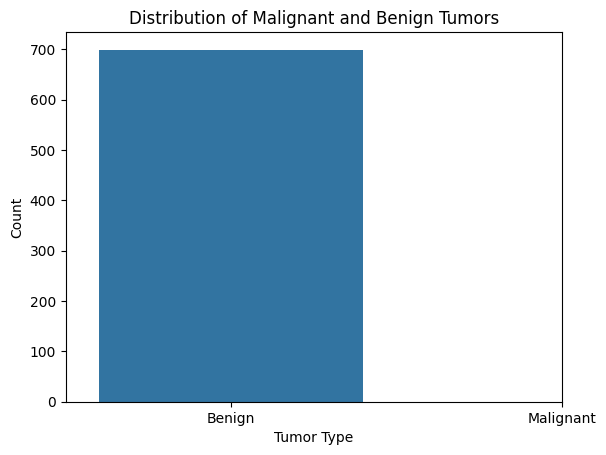

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           2       0.97      0.98      0.97        95
           4       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



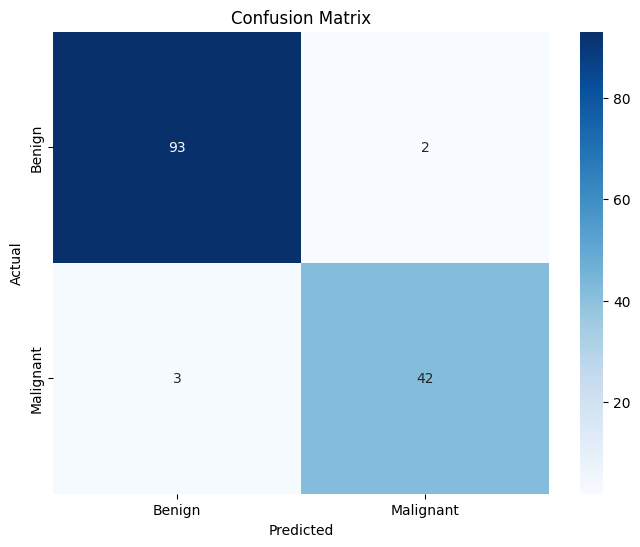

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
# Fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Display metadata and variable information
print(breast_cancer_wisconsin_original.metadata)
print(breast_cancer_wisconsin_original.variables)
# Display the first few rows of the dataset
print(X.head())
print(y.head())

# Check for missing values
print("Checking for NaN values in features:")
print(X.isnull().sum())

# Check for infinite values
print("Checking for infinite values in features:")
print((X == float('inf')).sum())
print((X == float('-inf')).sum())
# Handle missing values (example: fill with mean)
X.fillna(X.mean(), inplace=True)

# Alternatively, you can drop rows with NaN values
# X.dropna(inplace=True)
# y = y[X.index]  # Ensure y matches the new X
# Visualize the distribution of the target variable
sns.countplot(y)
plt.title('Distribution of Malignant and Benign Tumors')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()